In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0 #깊이를 설정해준다.
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

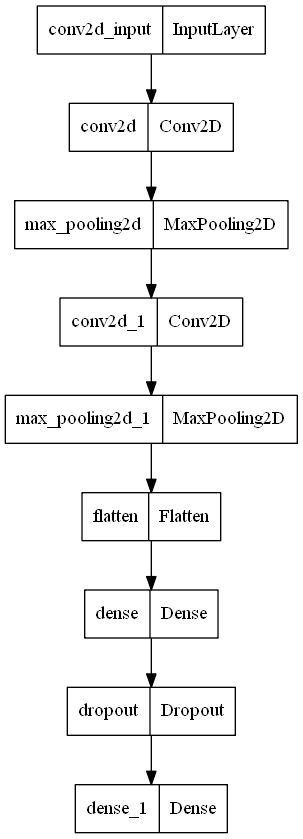

In [4]:
keras.utils.plot_model(model)

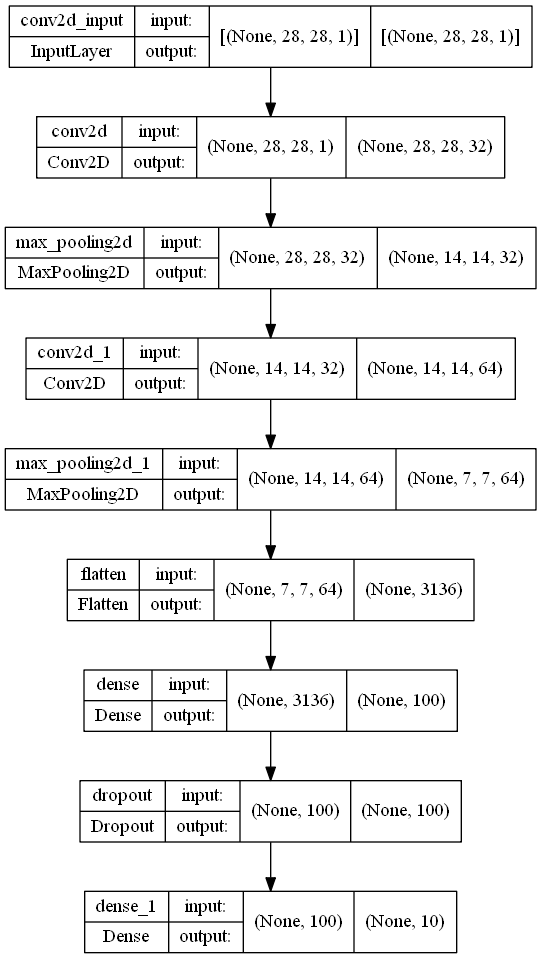

In [5]:
keras.utils.plot_model(model,show_shapes=True)

In [6]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                   validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.5441 - accuracy: 0.8048 - val_loss: 0.3334 - val_accuracy: 0.8764
Epoch 2/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3572 - accuracy: 0.8711 - val_loss: 0.2924 - val_accuracy: 0.8922
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.3060 - accuracy: 0.8907 - val_loss: 0.2650 - val_accuracy: 0.9028
Epoch 4/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2732 - accuracy: 0.9017 - val_loss: 0.2432 - val_accuracy: 0.9075
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2480 - accuracy: 0.9116 - val_loss: 0.2368 - val_accuracy: 0.9145
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2280 - accuracy: 0.9170 - val_loss: 0.2357 - val_accuracy: 0.9109
Epoch 7/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2095 - accuracy: 0.9226 - val_loss: 0.2241 - val_ac

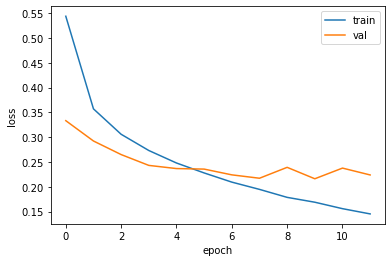

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2162 - accuracy: 0.9222


[0.21621376276016235, 0.922249972820282]

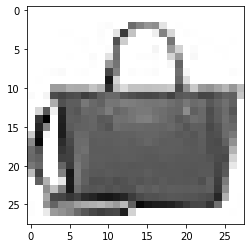

In [9]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.1256761e-18 6.4162950e-30 3.1901633e-23 6.7010187e-23 2.9441958e-19
  8.6767772e-19 1.7710374e-19 1.5441859e-17 1.0000000e+00 1.0275200e-17]]


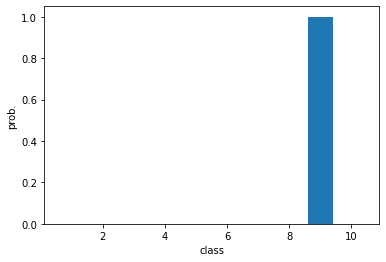

In [11]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()
    

In [12]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [13]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(train_scaled,train_target)

1500/1500 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9606


[0.10977143049240112, 0.960645854473114]

In [16]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [17]:
model.layers

In [18]:
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [19]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.026846528 0.24636017


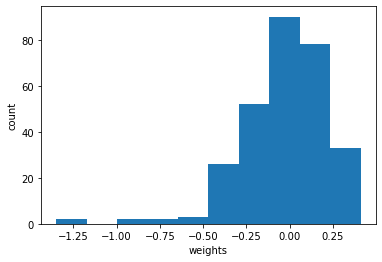

In [21]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

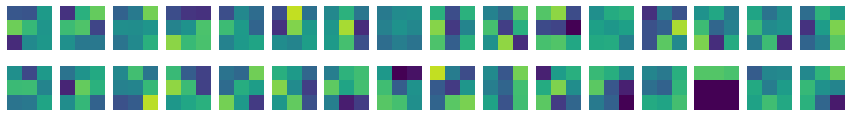

In [22]:
fig, axs = plt.subplots(2,16, figsize = (15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j],vmin=-0.5,vmax = 0.5)
        axs[i,j].axis('off')